In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# **1 Supervised learning**
1.1 Import the monthly and annual data and join

In Assignment #3, you created five different feature families that capture annual and monthly
aggregations. Here, you will model the retail problem with two approaches: using annual
and monthly features. Therefore, you need to create the joined tables based on the following
logic:

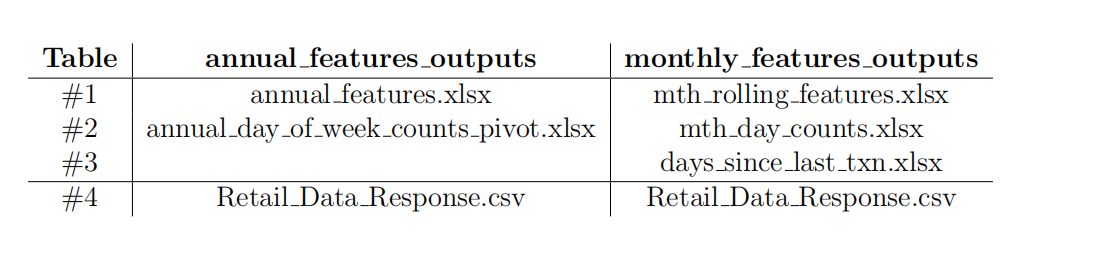
In both the annual and monthly features approach, you need to join at the end with table#4, the clients responses. This is simply a table that contains the binary response of the
client to our marketing effort as described above and that is the output or label or target
that makes this a supervised learning problem.

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
Data_Response = pd.read_csv('drive/MyDrive/CHE1147/A3/Retail_Data_Response.csv')

In [147]:
mth_rolling_features = pd.read_excel('drive/MyDrive/CHE1147/A3/mth_rolling_features.xlsx')
mth_rolling_features = mth_rolling_features.drop('Unnamed: 0', axis = 1)
mth_rolling_features = mth_rolling_features.fillna(0)

In [148]:
mth_day_counts = pd.read_excel('drive/MyDrive/CHE1147/A3/mth_day_counts.xlsx')
mth_day_counts = mth_day_counts.drop('Unnamed: 0', axis = 1)

In [149]:
day_since_last_txn = pd.read_excel('drive/MyDrive/CHE1147/A3/days_since_last_txn.xlsx')
day_since_last_txn = day_since_last_txn.drop('Unnamed: 0', axis = 1)

In [150]:
mth_features_merge = pd.merge(mth_rolling_features, mth_day_counts, on = ['CLNT_NO', 'ME_DT']).merge(day_since_last_txn, on = ['CLNT_NO', 'ME_DT']).merge(Data_Response.rename(columns={'customer_id': 'CLNT_NO'}), on = 'CLNT_NO')
mth_features_merge.head() 

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,CS1112,2011-05-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,0,-1,0
1,CS1112,2011-06-30,56,1,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,1,15,0
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,46,0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,0.0,1,0,0,0,0,0,0,12,0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,42,0


**1.2 Steps for each method (10 points)**
1. Separate the inputs X and the output y in two data frames.

In [152]:
y = mth_features_merge['response']
X = mth_features_merge.drop(['CLNT_NO', 'response', 'ME_DT'], axis = 1)

2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/3, random_state=1147)

3. Pre-process (if necessary for the method).

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Fit the training dataset and optimize the hyperparameters of the method.

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [225]:
LogReg = LogisticRegression(penalty ='l1', solver = 'liblinear', random_state=1147)
grid_search = GridSearchCV(LogReg, {'C':[0.01, 0.05, 0.1, 1, 10, 100]}, scoring='f1', cv=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_hyper = grid_search.best_params_
print ("Best f1: {}".format(grid_search.best_score_))      
print('The best parameter:', best_hyper)

Best f1: 0.0
The best parameter: {'C': 0.01}


In [226]:
LogReg = LogisticRegression(C=best_hyper['C'], penalty ='l1', solver = 'liblinear', random_state=1147)
LogReg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=1147, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, f1_score

In [ ]:
Cs = [0.01, 0.05, 0.1, 1, 10, 100]
max_depth_range = range(1, 15)
estimator_c = [] 
accuracy_train = [] 
accuracy_test = [] 
precisions = [] 
recalls = [] 
f1_train = [] 
f1_test = [] 
auc_train = [] 
auc_test = []
for i in range(len(Cs)):
    c = Cs[i]
    estimator_c.append(LogisticRegression(penalty='l1', C = c, solver='liblinear',class_weight='balanced',random_state=1147))
    estimator_c[i].fit(X_train, y_train)

    scores_train = estimator_c[i].predict_proba(X_train)[:,1] 
    scores_test  = estimator_c[i].predict_proba(X_test)[:,1]  

    y_train_predicted = estimator_c[i].predict(X_train)
    y_test_predicted = estimator_c[i].predict(X_test)
  
    accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True))
    accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True))
     
    f1_train.append(100*f1_score(y_train, y_train_predicted))
    f1_test.append(100*f1_score(y_test, y_test_predicted))
     
    precisions.append(precision_score(y_test, y_test_predicted))
    recalls.append(recall_score(y_test, y_test_predicted))
    
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
    
    performance_df = {'ACCURACY_TRAIN': accuracy_train, 
                              'ACCURACY_TEST': accuracy_test,  
                              'F1_TRAIN': f1_train, 
                              'F1_TEST': f1_test, 
                              'PRECISION': precisions, 
                              'RECALL': recalls, 
                              'AUC_TRAIN': auc_train, 
                              'AUC_TEST': auc_test}


In [231]:
performance_df = pd.DataFrame(performance_df)
performance_df.insert(0, 'C', value = Cs)

In [232]:
performance_df

,C,ACCURACY_TRAIN,ACCURACY_TEST,F1_TRAIN,F1_TEST,PRECISION,RECALL,AUC_TRAIN,AUC_TEST
0,0.01,63.459096,63.376279,21.331470,21.327916,0.133665,0.527436,0.629728,0.626897
1,0.05,63.573144,63.494036,21.368240,21.344308,0.133870,0.526254,0.630054,0.626982
2,0.10,63.592616,63.485691,21.370927,21.305890,0.133637,0.525170,0.629995,0.626855
3,1.00,63.610233,63.488009,21.413696,21.288079,0.133536,0.524579,0.629913,0.626684
4,10.00,63.610233,63.488009,21.407401,21.283358,0.133508,0.524431,0.629920,0.626666
5,100.00,63.607451,63.490790,21.409263,21.286208,0.133527,0.524480,0.629921,0.626669


5. Plot coefficient values or feature importance.

In [233]:
best_model = LogisticRegression(penalty='l1',solver='liblinear', C=0.01, class_weight='balanced',random_state=1147)
best_model.fit(X_train_scaled, y_train)
m = best_model.coef_
    
indices = np.argsort(abs(m[0]))[::-1]
names = [X.columns[i] for i in indices]
print(f'The indices for top 2 features are: {indices[0]}:{names[0]}, {indices[1]}:{names[1]} ')

The indices for top 2 features are: 15:amt_mean_12M, 14:amt_sum_12M 


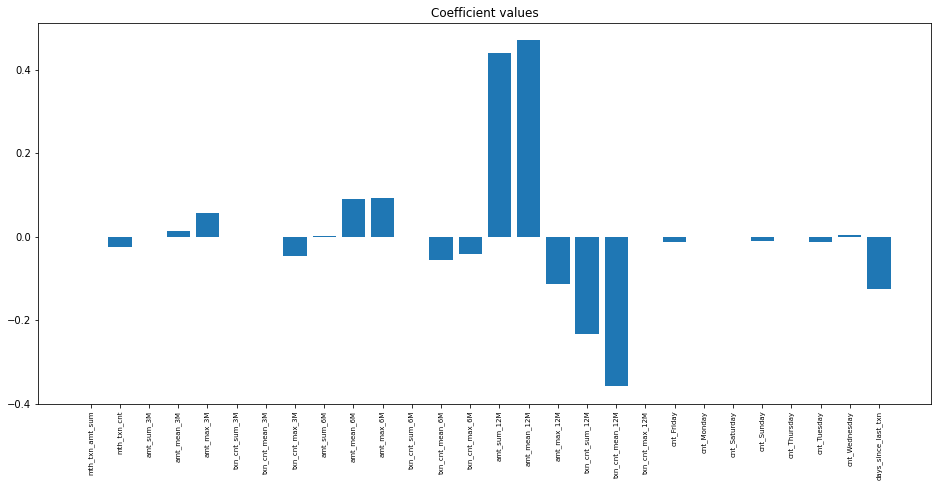

In [234]:
plt.figure(figsize=(16,7)) 
plt.bar(range(X.shape[1]), m[0])
plt.title("Coefficient values")
plt.xticks(range(X.shape[1]), X.columns, rotation=90,size=7)
plt.show()

6. Plot probability distribution for test set.

In [189]:
import seaborn as sns

In [235]:
y_test_pred = best_model.predict(X_test_scaled) 
y_test_prob = best_model.predict_proba(X_test_scaled) 

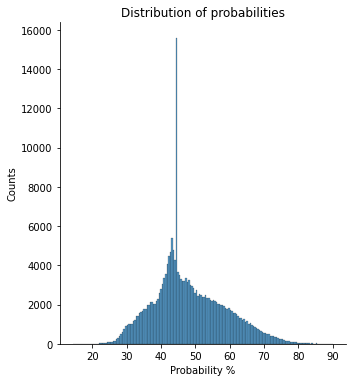

In [236]:
sns.displot(data = y_test_prob[:,1], x = 100 * y_test_prob[:,1])
plt.title('Distribution of probabilities')
plt.xlabel('Probability %')
plt.ylabel('Counts')
plt.show()

7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

In [192]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score

In [193]:
cm = confusion_matrix(y_test.values, y_test_pred)
 
precision = cm[1,1]/cm.sum(axis=0)[1]
recall = cm[1,1]/cm.sum(axis=1)[1]
 
print('Precision:', precision)
print('Recall', recall)

Precision: 0.13351139869084344
Recall 0.5244310905329524


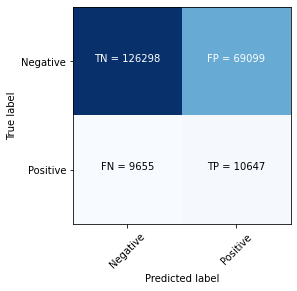

In [194]:
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 10,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

In [195]:
from sklearn.metrics import roc_curve, auc, f1_score

In [196]:
scores_train = best_model.predict_proba(X_train_scaled)[:, 1]
scores_test = best_model.predict_proba(X_test_scaled)[:, 1] 

In [197]:
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

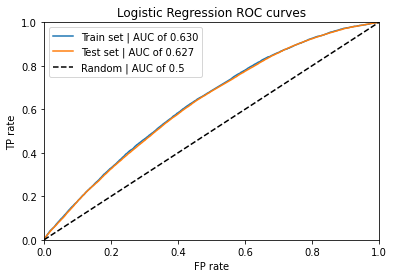

In [198]:
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Logistic Regression ROC curves')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.legend()

8. Plot decision boundary for top 2 features.

[(-2.0, 5.0),
 Text(0, 0.5, 'amt_sum_12M'),
 (-2.0, 5.0),
 Text(0.5, 0, 'amt_mean_12M'),
 None]

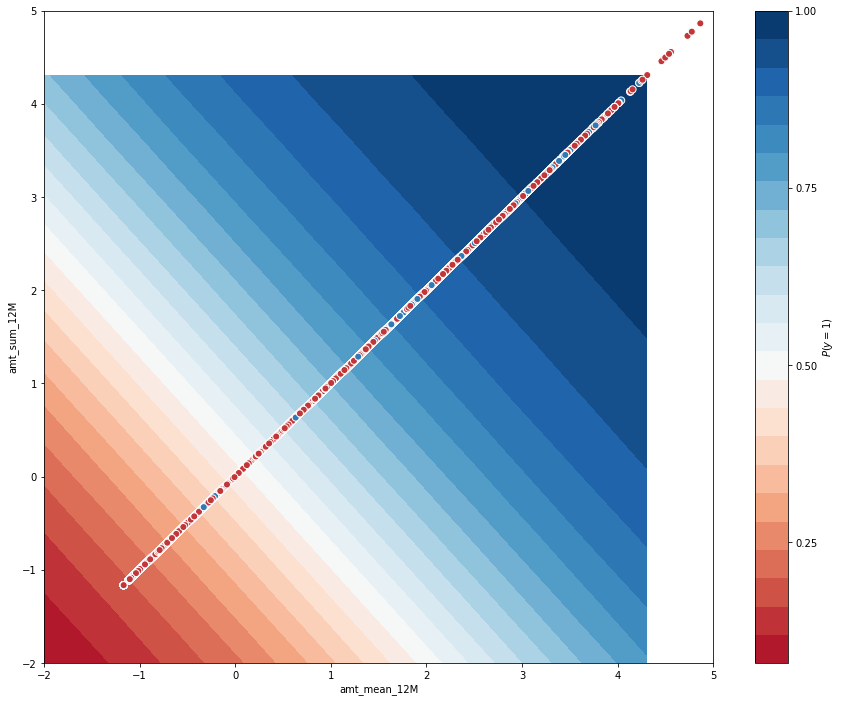

In [199]:
min_value1, min_value2 = np.floor(X_train_scaled.min(axis=0)[[15, 14]])
max_value1, max_value2 = np.ceil(X_train_scaled.max(axis=0)[[15, 14]])

step1, step2 = (max_value1-min_value1)/10, (max_value2-min_value2)/10
xx, yy = np.mgrid[min_value1:max_value1:step1, min_value2:max_value2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X.shape[1])) * np.median(X_train_scaled, axis=0)
median_inputs[:,15] = grid[:,0]
median_inputs[:,14] = grid[:,1]
 
probs = best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
 
f, ax = plt.subplots(figsize=(15,12))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_scaled[50:,15], X_train_scaled[50:,14], c=y_train[50:], s=50,cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto", xlim=(min_value1, max_value1), ylim=(min_value2, max_value2),xlabel=f"{X_train.columns[15]}", ylabel=f"{X_train.columns[14]}")

**1.3 Comparison of methods (10 points)**
Compare the two feature engineering (annual and monthly) and the three modeling approaches (L1 log-reg, tree, forests) in terms of the outcomes of steps 5-8. Which combination of feature engineering and modeling approach do you select as the best to deploy in a
production environment and why? Tabularize your findings in steps 5-8 to summarize the
results and support your decision (how to organize information with tables in Markdown).

Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [200]:
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 15)
estimator_max_depth = [] 
accuracy_train = [] 
accuracy_test = [] 
precisions = [] 
recalls = [] 
f1_train = [] 
f1_test = [] 
auc_train = [] 
auc_test = []
for i in max_depth_range:

    estimator_max_depth.append(DecisionTreeClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train, y_train)

    scores_train = estimator_max_depth[i-1].predict_proba(X_train)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test)[:,1]  

    y_train_predicted = estimator_max_depth[i-2].predict(X_train) 
    y_test_predicted = estimator_max_depth[i-2].predict(X_test) 
 
    accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True)) 
    accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True)) 
 
    f1_train.append(100*f1_score(y_train, y_train_predicted)) 
    f1_test.append(100*f1_score(y_test, y_test_predicted)) 

    precisions.append(precision_score(y_test, y_test_predicted)) 
    recalls.append(recall_score(y_test, y_test_predicted)) 

    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train) 
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test) 
 
    auc_train.append(auc(fpr_train, tpr_train)) 
    auc_test.append(auc(fpr_test, tpr_test)) 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [201]:
performance_dictionary = {'ACCURACY_TRAIN': accuracy_train, 
                              'ACCURACY_TEST': accuracy_test,  
                              'F1_TRAIN': f1_train, 
                              'F1_TEST': f1_test, 
                              'PRECISION': precisions, 
                              'RECALL': recalls, 
                              'AUC_TRAIN': auc_train, 
                              'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1


In [203]:
performance_df

,ACCURACY_TRAIN,ACCURACY_TEST,F1_TRAIN,F1_TEST,PRECISION,RECALL,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,90.628564,90.587810,0.000000,0.000000,0.000000,0.000000,0.594127,0.588387,1
1,90.628564,90.587810,0.000000,0.000000,0.000000,0.000000,0.619378,0.614206,2
2,90.628564,90.587810,0.000000,0.000000,0.000000,0.000000,0.632740,0.628077,3
3,90.628564,90.587810,0.000000,0.000000,0.000000,0.000000,0.639305,0.633332,4
4,90.633200,90.586419,0.098892,0.009849,0.200000,0.000049,0.644058,0.635200,5
5,90.643400,90.573438,0.669357,0.274658,0.321839,0.001379,0.647899,0.635656,6
6,90.660090,90.571584,0.924560,0.323482,0.326733,0.001625,0.653900,0.634257,7
7,90.676780,90.538204,1.353870,0.429331,0.225641,0.002167,0.659656,0.635386,8
8,90.710160,90.523832,2.205954,0.767065,0.266892,0.003891,0.667232,0.634620,9
9,90.771356,90.477471,3.453293,1.021588,0.235556,0.005221,0.677011,0.633238,10


When max depth = 10 Auc score relatively high and F1 score is close to 1

In [204]:
best_model = DecisionTreeClassifier(max_depth=10, random_state=0, class_weight='balanced') 
best_model.fit(X_train, y_train) 
importances = best_model.feature_importances_ 
    
indices = np.argsort(abs(importances))[::-1]
names = [X.columns[i] for i in indices]
print(f'The indices for top 2 features are: {indices[0]}:{names[0]}, {indices[1]}:{names[1]} ')

The indices for top 2 features are: 15:amt_mean_12M, 16:amt_max_12M 


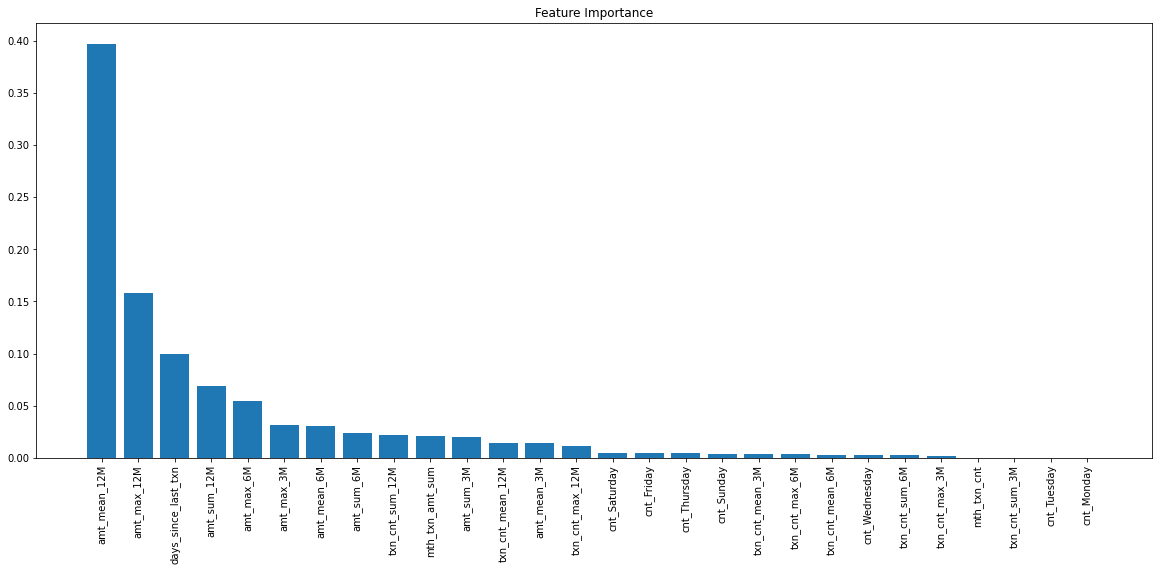

In [205]:
names = [X.columns[i] for i in indices] 
plt.figure(figsize=(20,8)) 
plt.title("Feature Importance") 
plt.bar(range(X.shape[1]), importances[indices]) 
plt.xticks(range(X.shape[1]), names, rotation=90) 
plt.show()

In [206]:
y_test_pred = best_model.predict(X_test) 
y_test_prob = best_model.predict_proba(X_test) 
 
scores_train = best_model.predict_proba(X_train)[:, 1] 
scores_test = best_model.predict_proba(X_test)[:, 1] 

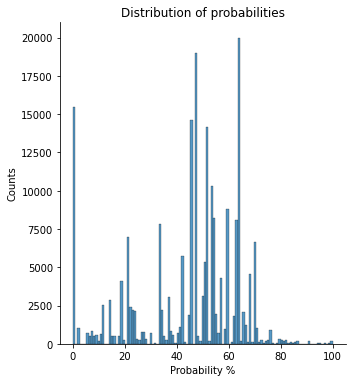

In [207]:
sns.displot(data = y_test_prob[:,0], x = 100*y_test_prob[:,1])
plt.title('Distribution of probabilities')
plt.xlabel('Probability %')
plt.ylabel('Counts')
plt.show()

In [208]:
cm = confusion_matrix(y_test.values, y_test_pred)
 
precision = cm[1,1]/cm.sum(axis=0)[1]
recall = cm[1,1]/cm.sum(axis=1)[1]
 
print('Precision:', precision)
print('Recall', recall)

Precision: 0.12734149179774015
Recall 0.6683577972613536


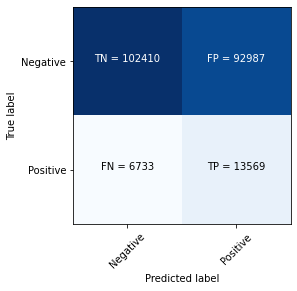

In [209]:
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 10,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

In [210]:
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

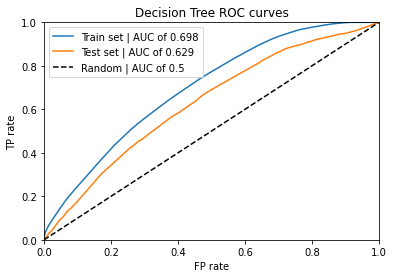

In [211]:
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


[(0.0, 460.0),
 Text(0, 0.5, 'amt_max_12M'),
 (0.0, 102.0),
 Text(0.5, 0, 'amt_mean_12M'),
 None]

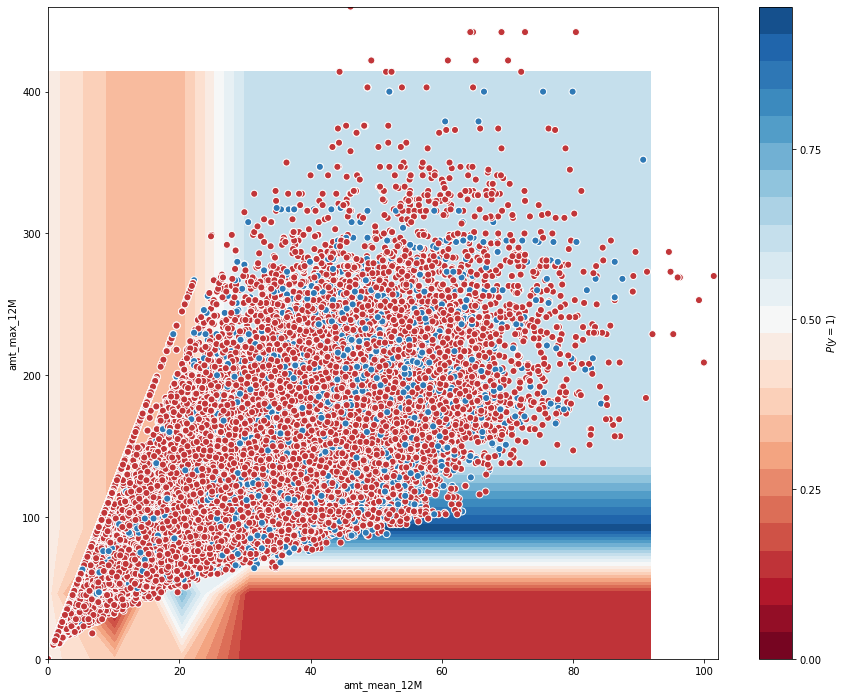

In [212]:
min_value1, min_value2 = np.floor(X_train.values.min(axis=0)[[15, 16]])
max_value1, max_value2 = np.ceil(X_train.values.max(axis=0)[[15, 16]])

step1, step2 = (max_value1-min_value1)/10, (max_value2-min_value2)/10
xx, yy = np.mgrid[min_value1:max_value1:step1, min_value2:max_value2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X.shape[1])) * np.median(X_train.values, axis=0)
median_inputs[:,15] = grid[:,0]
median_inputs[:,16] = grid[:,1]
 
probs = best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
 
f, ax = plt.subplots(figsize=(15,12))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train.values[50:,15], X_train.values[50:,16], c=y_train[50:], s=50,cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto", xlim=(min_value1, max_value1), ylim=(min_value2, max_value2),xlabel=f"{X_train.columns[15]}", ylabel=f"{X_train.columns[16]}")

Random Forest

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
max_depth_range = range(1, 15)
estimator_max_depth = [] 
accuracy_train = [] 
accuracy_test = [] 
precisions = [] 
recalls = [] 
f1_train = [] 
f1_test = [] 
auc_train = [] 
auc_test = []
for i in max_depth_range:

    estimator_max_depth.append(RandomForestClassifier(max_depth = i,class_weight='balanced', random_state=1147)) 
    estimator_max_depth[i-1].fit(X_train, y_train)

    scores_train = estimator_max_depth[i-1].predict_proba(X_train)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test)[:,1]  

    y_train_predicted = estimator_max_depth[i-2].predict(X_train) 
    y_test_predicted = estimator_max_depth[i-2].predict(X_test) 
 
    accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True)) 
    accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True)) 
 
    f1_train.append(100*f1_score(y_train, y_train_predicted)) 
    f1_test.append(100*f1_score(y_test, y_test_predicted)) 

    precisions.append(precision_score(y_test, y_test_predicted)) 
    recalls.append(recall_score(y_test, y_test_predicted)) 

    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train) 
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test) 
 
    auc_train.append(auc(fpr_train, tpr_train)) 
    auc_test.append(auc(fpr_test, tpr_test)) 

In [215]:
performance_dictionary = {'ACCURACY_TRAIN': accuracy_train, 
                          'ACCURACY_TEST': accuracy_test,  
                          'F1_TRAIN': f1_train, 
                          'F1_TEST': f1_test, 
                          'PRECISION': precisions, 
                          'RECALL': recalls, 
                          'AUC_TRAIN': auc_train, 
                          'AUC_TEST': auc_test} 
performance_df = pd.DataFrame(performance_dictionary) 
performance_df.insert(0, 'MAX_DEPTH', value = max_depth_range)  

In [216]:
performance_df

,MAX_DEPTH,ACCURACY_TRAIN,ACCURACY_TEST,F1_TRAIN,F1_TEST,PRECISION,RECALL,AUC_TRAIN,AUC_TEST
0,1,60.116459,60.151878,21.386797,21.321079,0.130939,0.573638,0.618203,0.614692
1,2,60.116459,60.151878,21.386797,21.321079,0.130939,0.573638,0.636381,0.631647
2,3,60.219381,60.171350,21.848188,21.626405,0.132712,0.583834,0.641953,0.636168
3,4,59.811403,59.741121,21.931231,21.736544,0.133022,0.593981,0.646878,0.639419
4,5,58.996375,58.848210,22.097735,21.839283,0.132967,0.610827,0.653305,0.641742
5,6,57.419169,57.154646,22.276381,21.935211,0.132378,0.639543,0.663122,0.644188
6,7,57.727007,57.367906,22.728428,22.018131,0.132986,0.639444,0.676054,0.646048
7,8,59.098369,58.338240,23.496358,22.103949,0.134123,0.628017,0.692525,0.647555
8,9,60.623650,59.382751,24.477601,22.154694,0.135154,0.614077,0.713941,0.647373
9,10,62.952832,61.135193,25.848598,22.238301,0.136990,0.590434,0.739153,0.648886


I choose depth = 13 for better performance

In [217]:
best_model = RandomForestClassifier(max_depth = 13, random_state=1147, class_weight='balanced') 
best_model.fit(X_train, y_train) 
 
importances = best_model.feature_importances_ 
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices] 
print(f'The indices for top 2 features are: {indices[0]}:{names[0]}, {indices[1]}:{names[1]}')

The indices for top 2 features are: 14:amt_sum_12M, 15:amt_mean_12M


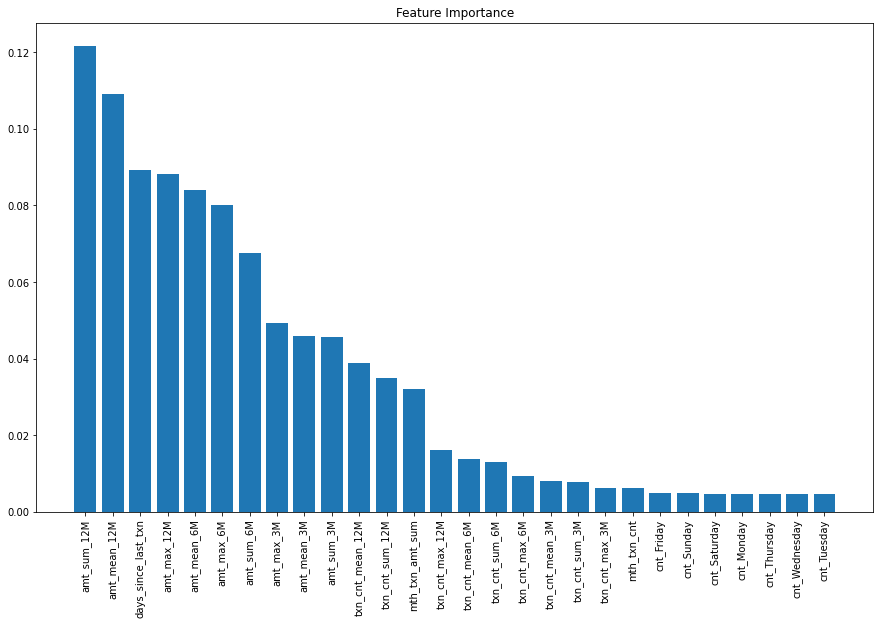

In [218]:
plt.figure(figsize=(15,9)) 
plt.title("Feature Importance") 
plt.bar(range(X.shape[1]), importances[indices]) 
plt.xticks(range(X.shape[1]), names, rotation=90) 
plt.show() 
 
y_test_pred = best_model.predict(X_test) 
y_test_prob = best_model.predict_proba(X_test) 

scores_train = best_model.predict_proba(X_train)[:, 1] 
scores_test = best_model.predict_proba(X_test)[:, 1]

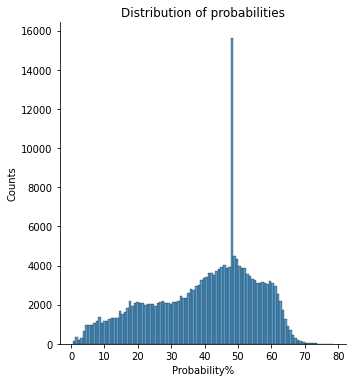

In [219]:
sns.displot(data = y_test_prob[:,1], x = 100*y_test_prob[:,1])
plt.title('Distribution of probabilities')
plt.xlabel('Probability%')
plt.ylabel('Counts')
plt.show()

In [220]:
cm = confusion_matrix(y_test.values, y_test_pred)
 
precision = cm[1,1]/cm.sum(axis=0)[1]
recall = cm[1,1]/cm.sum(axis=1)[1]
 
print('Precision:', precision)
print('Recall', recall)

Precision: 0.14796700251067854
Recall 0.4470495517682987


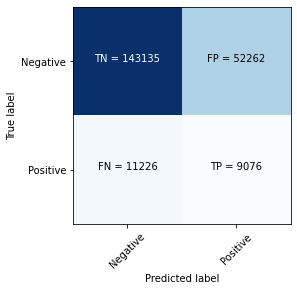

In [221]:
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 10,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

In [222]:
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

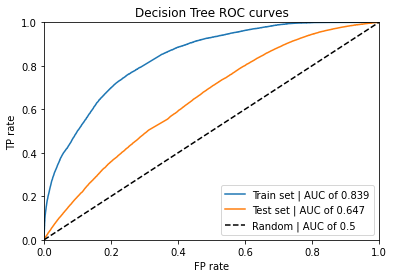

In [223]:
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[(0.0, 102.0),
 Text(0, 0.5, 'amt_mean_12M'),
 (0.0, 1217.0),
 Text(0.5, 0, 'amt_sum_12M'),
 None]

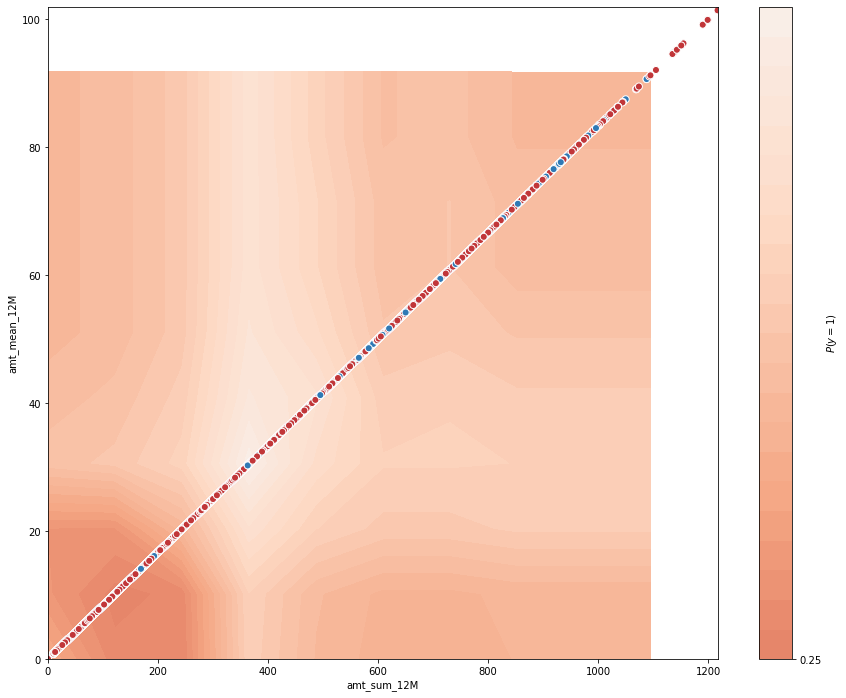

In [224]:
min_value1, min_value2 = np.floor(X_train.values.min(axis=0)[[14, 15]])
max_value1, max_value2 = np.ceil(X_train.values.max(axis=0)[[14, 15]])

step1, step2 = (max_value1-min_value1)/10, (max_value2-min_value2)/10
xx, yy = np.mgrid[min_value1:max_value1:step1, min_value2:max_value2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X.shape[1])) * np.median(X_train.values, axis=0)
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]
 
probs = best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
 
f, ax = plt.subplots(figsize=(15,12))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train.values[50:,14], X_train.values[50:,15], c=y_train[50:], s=50,cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto", xlim=(min_value1, max_value1), ylim=(min_value2, max_value2),xlabel=f"{X_train.columns[14]}", ylabel=f"{X_train.columns[15]}")

| model| Precision| Recall| AUC| Accuracy|
|-------|-------|-------|-------|-------|
|LR|0.1335|0.5244|0.627|63.38|
|DT|0.1273|0.6684|0.6332|90.48|
|RF|0.1480|0.4770|0.6481|35.54|	

According to the accuracy score, we can see that the decision tree seems more better and their other score are similar.